# Analysis of different ML algorithms applied to heart failure prediction problem

**Table of Content**
1. Modules configuration
2. Data
    - 2.1. Attribute Information
    - 2.2. Importing data
    - 2.3. Analysing data
3. Part 1: ZR and NBG


***

## 1. Modules configuration

In [1]:
# DataSci basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprosseing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML algorithms
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# ML create estimator
from sklearn.base import BaseEstimator

# Train-test related modules
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score,\
                balanced_accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_rel, wilcoxon
import scipy.stats as stats

# Others
import itertools

***

## 2. Data

The data used in this project is part of the [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv), composed of 5 different datasets from:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

The final dataset, after the removal of duplicates, has 918 instances, 11 different features and 2 classes. 



### 2.1. Attribute Information

| Atribute | Description | Value type |
|---|---|---|
|Age | Age of the patient in years | Continuous |
| Sex | Sex of the patient with M: Male, F: Female. | Binary categorical |
| ChestPainType | Chest pain type with TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic. | Categorical  |
| RestingBP | Resting blood pressure measured in mm Hg | Continuous |
| Cholesterol | Serum cholesterol in mm/dl | Continuous |
| FastingBS | Fasting blood sugar with 1: if FastingBS > 120 mg/dl, 0: otherwise | Binary categorical |
| RestingECG | Resting electrocardiogram results with values Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria | Categorical |
| MaxHR | Maximum heart rate achieved with numeric value between 60 and 202 | Continuous |
| ExerciseAngina | Exercise-induced angina with Y: Yes, N: No. | Binary categorical |
| Oldpeak | Oldpeak = ST with numeric value measured in depression. | Continuous |
| ST_Slope | The slope of the peak exercise ST segment with Up: upsloping, Flat: flat, Down: downsloping. | Categorical |
| HeartDisease | Output class with 1: heart disease, 0: Normal. | Binary categorical |

### 2.2. Importing data

In [2]:
PATH = "../data/heart.csv"
raw_data = pd.read_csv(PATH, sep=',')
raw_data.head(8)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


In [3]:
raw_data.shape

(918, 12)

### 2.3. Analysing data

In [4]:
raw_data_corr = raw_data.corr()
raw_data_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


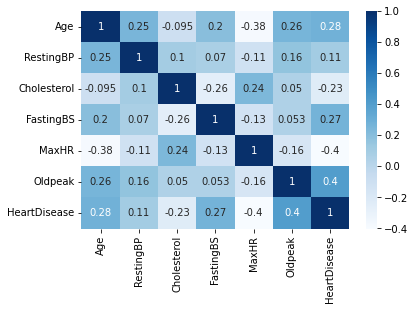

In [5]:
sns.heatmap(raw_data_corr, annot=True, cmap="Blues")
plt.show()

Age, FastingBS and Oldpeak seems to be the attributes with the highest correlation with Heart Disease. MAXHR and HeartDisease also have a high negative correlation.

#### Initial attribute types

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
raw_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Analysing continuous values

In [8]:
continuous_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
raw_data[continuous_variables].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


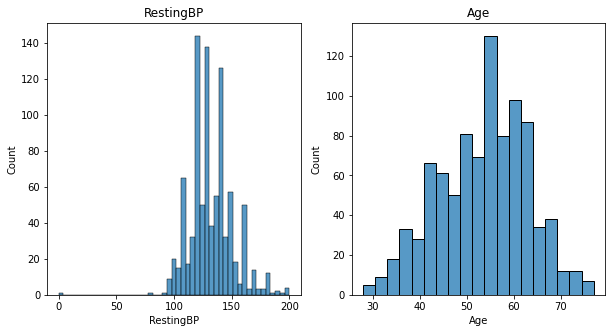

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

output = sns.histplot(raw_data, x="RestingBP", ax=ax[0])
ax[0].set_title('RestingBP')

output = sns.histplot(raw_data, x="Age", ax=ax[1])
ax[1].set_title('Age')
    
plt.show()

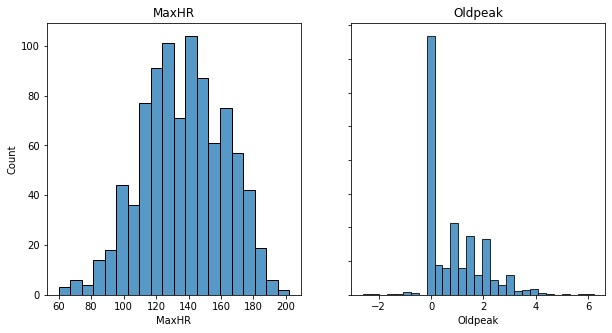

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

output = sns.histplot(raw_data, x="MaxHR", ax=ax[0])
ax[0].set_title('MaxHR')

output = sns.histplot(raw_data, x="Oldpeak", ax=ax[1])
ax[1].set_title('Oldpeak')

for a in ax.flat:
    a.label_outer()
    
plt.show()

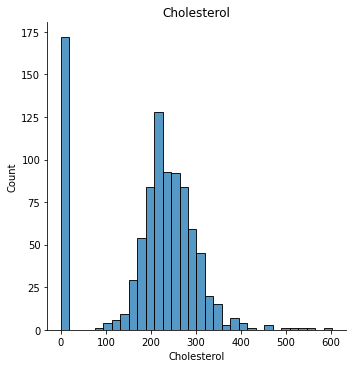

In [11]:
sns.displot(raw_data, x="Cholesterol")
plt.title("Cholesterol")
plt.show()

#### Description of categorical values

In [12]:
raw_data['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

In [13]:
raw_data['ChestPainType'].value_counts(normalize=True)

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64

In [14]:
raw_data['FastingBS'].value_counts(normalize=True)

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64

In [15]:
raw_data['RestingECG'].value_counts(normalize=True)

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64

In [16]:
raw_data['ExerciseAngina'].value_counts(normalize=True)

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64

In [17]:
raw_data['ST_Slope'].value_counts(normalize=True)

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

In [18]:
raw_data['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [19]:
sex_dict = {"M":0, "F":1}
chestpain_dict = {"ASY":1, "NAP":2, "ATA":3, "TA": 4}
resting_dict = {"Normal":1, "LVH":2, "ST":3}
exercise_dict = {"N":0, "Y":1}
slope_dict = {"Flat":1, "Up":2, "Down":3}

category_dict = {"Sex":sex_dict, 
                 "ChestPainType":chestpain_dict, 
                 "RestingECG": resting_dict, 
                 "ExerciseAngina":exercise_dict, 
                 "ST_Slope":slope_dict}

In [20]:
treated_cat_data = raw_data.replace(category_dict)

#### Analyzing cholesterol

In [21]:
zero_cholesterol = treated_cat_data[treated_cat_data['Cholesterol'] == 0]

In [22]:
zero_cholesterol.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,172.000000,172.000000,172.000000,172.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,56.238372,0.063953,1.366279,129.680233,0.0,0.517442,1.686047,121.988372,0.488372,0.825581,1.500000,0.883721
std,8.616327,0.245384,0.700561,22.971558,0.0,0.501155,0.914620,24.166331,0.501324,1.039645,0.696692,0.321495
min,32.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,51.750000,0.000000,1.000000,115.000000,0.0,0.000000,1.000000,108.000000,0.000000,0.000000,1.000000,1.000000
50%,57.500000,0.000000,1.000000,129.000000,0.0,1.000000,1.000000,120.000000,0.000000,0.750000,1.000000,1.000000
75%,62.000000,0.000000,2.000000,140.000000,0.0,1.000000,3.000000,138.250000,1.000000,1.500000,2.000000,1.000000
max,74.000000,1.000000,4.000000,200.000000,0.0,1.000000,3.000000,182.000000,1.000000,3.700000,3.000000,1.000000


In [23]:
zero_cholesterol["FastingBS"].value_counts(normalize=True)

1    0.517442
0    0.482558
Name: FastingBS, dtype: float64

In [24]:
zero_cholesterol["FastingBS"].value_counts()

1    89
0    83
Name: FastingBS, dtype: int64

In [25]:
zero_cholesterol["HeartDisease"].value_counts(normalize=True)

1    0.883721
0    0.116279
Name: HeartDisease, dtype: float64

In [26]:
zero_cholesterol["HeartDisease"].value_counts()

1    152
0     20
Name: HeartDisease, dtype: int64

In [27]:
print(f"Amount of cholesterol = 0 in the dataset: {len(zero_cholesterol)/918 * 100:0.2f}%")

Amount of cholesterol = 0 in the dataset: 18.74%


In [28]:
valued_cholesterol = treated_cat_data[treated_cat_data['Cholesterol'] != 0]
valued_cholesterol.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.243968,1.836461,133.022788,244.635389,0.167560,1.571046,140.226542,0.384718,0.901609,1.583110,0.477212
std,9.505888,0.429762,0.955414,17.282750,59.153524,0.373726,0.762136,24.524107,0.486855,1.072861,0.599045,0.499816
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,1.000000,69.000000,0.000000,-0.100000,1.000000,0.000000
25%,46.000000,0.000000,1.000000,120.000000,207.250000,0.000000,1.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,237.000000,0.000000,1.000000,140.000000,0.000000,0.500000,2.000000,0.000000
75%,59.000000,0.000000,3.000000,140.000000,275.000000,0.000000,2.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [29]:
valued_cholesterol["FastingBS"].value_counts(normalize=True)

0    0.83244
1    0.16756
Name: FastingBS, dtype: float64

In [30]:
valued_cholesterol["FastingBS"].value_counts()

0    621
1    125
Name: FastingBS, dtype: int64

In [31]:
valued_cholesterol["HeartDisease"].value_counts(normalize=True)

0    0.522788
1    0.477212
Name: HeartDisease, dtype: float64

In [32]:
treated_cat_data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [33]:
treated_cat_data["HeartDisease"].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [34]:
treated_cat_data["FastingBS"].value_counts(normalize=True)

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64

In [35]:
treated_cat_data["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [36]:
152/508

0.2992125984251969

In [37]:
89/214

0.4158878504672897

If the rows with cholesterol = 0 were to be removed, the class of HeatDisease would lose 29.9% of the positive cases. The ratio would go from 55:45 to 52:48, with 746 cases instead of 918. Also a lot of the cases (41.6%) of fasting don't have information on cholesterol. If we were to remove the tuples where cholesterol is 0, the situation where the patient isn't fasting  goes from 76.7% to 83.2%, making this attribute even more inbalanced.

In [38]:
cholesterol_corr = valued_cholesterol.corr(method ='spearman')
cholesterol_corr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.044803,-0.183658,0.284774,0.083445,0.240171,0.240548,-0.363049,0.244779,0.334900,-0.151871,0.307044
Sex,-0.044803,1.000000,0.163711,-0.054076,0.092334,-0.096075,-0.013404,0.162833,-0.192579,-0.131660,0.076222,-0.292779
ChestPainType,-0.183658,0.163711,1.000000,-0.072640,-0.072627,-0.051374,-0.101541,0.370476,-0.474377,-0.343039,0.296713,-0.501939
RestingBP,0.284774,-0.054076,-0.072640,1.000000,0.092371,0.174927,0.087450,-0.131590,0.175679,0.200337,-0.065104,0.177632
Cholesterol,0.083445,0.092334,-0.072627,0.092371,1.000000,0.044568,0.044312,-0.002708,0.112084,0.086065,-0.086136,0.114898
FastingBS,0.240171,-0.096075,-0.051374,0.174927,0.044568,1.000000,0.173260,-0.097683,0.109995,0.095044,-0.075458,0.160594
RestingECG,0.240548,-0.013404,-0.101541,0.087450,0.044312,0.173260,1.000000,-0.090958,0.112645,0.127309,-0.050351,0.135957
MaxHR,-0.363049,0.162833,0.370476,-0.131590,-0.002708,-0.097683,-0.090958,1.000000,-0.413182,-0.303483,0.306623,-0.385004
ExerciseAngina,0.244779,-0.192579,-0.474377,0.175679,0.112084,0.109995,0.112645,-0.413182,1.000000,0.504540,-0.371349,0.551834
Oldpeak,0.334900,-0.131660,-0.343039,0.200337,0.086065,0.095044,0.127309,-0.303483,0.504540,1.000000,-0.351247,0.504321


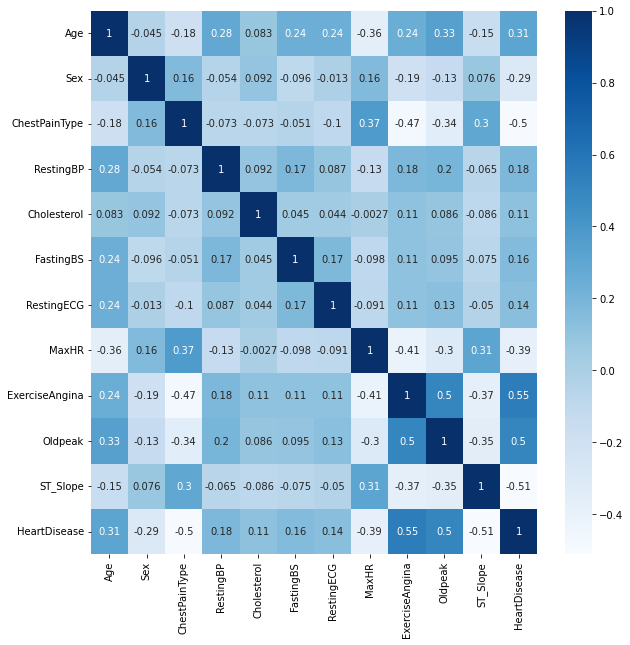

In [39]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(cholesterol_corr, annot=True, cmap="Blues")
plt.show()

Due to the uncertain nature of the cholesterol values that are equal to 0, and it taking up 18.74% of the values, it was decided that the missing values should be the mean of cholesterol in the database. Since the context of the problem depends on a greater knowledge of a few medical characteristics and we don't have any acess to a medical professional, a mean value could potentially create an impact in the models with a degree of uncertainty.

#### Anayzing Oldpeak

In this database, most values of oldpeak are positive. Oldpeak is the ST depression induced by exercise relative to rest in EGC exams and is often a sign of myocardial ischemia. There are a few types of ischemia, [a condition in which the blood flow (and thus oxygen) is restricted or reduced in a part of the body](https://www.heart.org/en/health-topics/heart-attack/about-heart-attacks/silent-ischemia-and-ischemic-heart-disease#:~:text=Ischemia%20is%20a%20condition%20in,oxygen%20to%20the%20heart%20muscle.), and the ST depression or elevation tends to differ. 

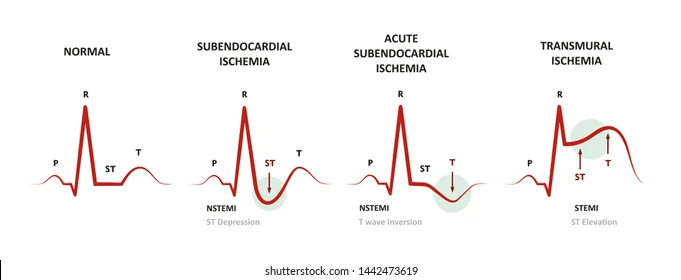

In [40]:
negative_oldpeak = treated_cat_data[treated_cat_data["Oldpeak"] < 0]
negative_oldpeak

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,0,1,100,0,1,1,109,0,-0.9,1,1
324,46,0,1,100,0,1,3,133,0,-2.6,1,1
325,42,0,1,105,0,1,1,128,1,-1.5,3,1
326,45,0,2,110,0,0,1,138,0,-0.1,2,0
331,56,0,1,115,0,1,3,82,0,-1.0,2,1
332,38,0,2,100,0,0,1,179,0,-1.1,2,0
334,51,0,1,130,0,1,1,170,0,-0.7,2,1
335,62,0,4,120,0,1,2,134,0,-0.8,1,1
352,56,0,1,120,0,0,3,100,1,-1.0,3,1
407,62,0,1,115,0,1,1,72,1,-0.5,1,1


In [41]:
negative_oldpeak.shape

(13, 12)

In [42]:
negative_oldpeak["HeartDisease"].value_counts(normalize=True)

1    0.692308
0    0.307692
Name: HeartDisease, dtype: float64

In [43]:
negative_oldpeak["RestingECG"].value_counts()

1    7
3    5
2    1
Name: RestingECG, dtype: int64

In [44]:
negative_oldpeak["ChestPainType"].value_counts()

1    7
2    5
4    1
Name: ChestPainType, dtype: int64

In [45]:
negative_oldpeak.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,52.153846,0.0,1.615385,114.076923,12.384615,0.615385,1.846154,124.307692,0.230769,-0.984615,1.769231,0.692308
std,10.147628,0.0,0.869718,10.218134,44.653366,0.506370,0.987096,32.060840,0.438529,0.711625,0.725011,0.480384
min,35.000000,0.0,1.000000,100.000000,0.000000,0.000000,1.000000,72.000000,0.000000,-2.600000,1.000000,0.000000
25%,45.000000,0.0,1.000000,105.000000,0.000000,0.000000,1.000000,100.000000,0.000000,-1.100000,1.000000,0.000000
50%,56.000000,0.0,1.000000,115.000000,0.000000,1.000000,1.000000,128.000000,0.000000,-0.900000,2.000000,1.000000
75%,62.000000,0.0,2.000000,120.000000,0.000000,1.000000,3.000000,138.000000,0.000000,-0.500000,2.000000,1.000000
max,66.000000,0.0,4.000000,130.000000,161.000000,1.000000,3.000000,179.000000,1.000000,-0.100000,3.000000,1.000000


In [46]:
negative_oldpeak.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,NaN,0.082801,0.241784,-0.507911,0.336827,0.052477,-0.643072,0.066263,0.059653,-0.391212,0.420796
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,0.082801,NaN,1.000000,0.238034,0.132874,-0.174667,0.022401,0.285525,-0.403376,0.225789,-0.284649,-0.306858
RestingBP,0.241784,NaN,0.238034,1.000000,0.262382,-0.042123,0.174774,-0.068505,-0.041486,0.342487,0.081337,0.056154
Cholesterol,-0.507911,NaN,0.132874,0.262382,1.000000,-0.365148,0.351220,0.268894,-0.158114,0.373503,0.095637,-0.433013
FastingBS,0.336827,NaN,-0.174667,-0.042123,-0.365148,1.000000,-0.294969,-0.351417,0.057735,-0.490982,-0.488901,0.843274
RestingECG,0.052477,NaN,0.022401,0.174774,0.351220,-0.294969,1.000000,-0.151105,-0.103661,-0.043803,0.179144,-0.108148
MaxHR,-0.643072,NaN,0.285525,-0.068505,0.268894,-0.351417,-0.151105,1.000000,-0.432226,0.106064,0.196904,-0.501948
ExerciseAngina,0.066263,NaN,-0.403376,-0.041486,-0.158114,0.057735,-0.103661,-0.432226,1.000000,-0.012325,0.443563,0.365148
Oldpeak,0.059653,NaN,0.225789,0.342487,0.373503,-0.490982,-0.043803,0.106064,-0.012325,1.000000,0.217429,-0.521291


In [47]:
13/918

0.014161220043572984

It is uncertain why some of the values of Oldpeak were negative, especially in a such low percentage, with approximately 1.4% cases. It might be due to the fact that the ST could have a depression or an elevation compared to the base line, and those negative or positive values could be representing that. The deffinition of the feature is ST depression, therefore it could be that the negative values actually mean an elevation. I wasn't able to find data in terms of the frequency of one happening compared to the other. Another possibility might be that some of the values were inputed as absolute, without a sign representing direction (elevation vs depression). Therefore, I decided to maintain the values as they could have potential meaning and at worst it is noise that represents 1.41% of the values. The high amount of 0 could be the representation of a high amount of ST depression values.

#### Concluding remarks

In [48]:
treated_cat_data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.748366,132.396514,198.799564,0.233115,1.592593,136.809368,0.404139,0.887364,1.567538,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [49]:
treated_cat_data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,-0.165896,0.254399,-0.095282,0.198039,0.210498,-0.382045,0.215793,0.258612,-0.093424,0.282039
Sex,-0.055750,1.000000,0.168254,-0.005133,0.200092,-0.120076,-0.038320,0.189186,-0.190664,-0.105734,0.066831,-0.305445
ChestPainType,-0.165896,0.168254,1.000000,-0.022168,0.136139,-0.116703,-0.065099,0.343654,-0.416625,-0.245027,0.202675,-0.471354
RestingBP,0.254399,-0.005133,-0.022168,1.000000,0.100893,0.070193,0.117206,-0.112135,0.155101,0.164803,-0.083418,0.107589
Cholesterol,-0.095282,0.200092,0.136139,0.100893,1.000000,-0.260974,-0.042595,0.235792,-0.034166,0.050148,0.007110,-0.232741
FastingBS,0.198039,-0.120076,-0.116703,0.070193,-0.260974,1.000000,0.120774,-0.131438,0.060451,0.052698,-0.043534,0.267291
RestingECG,0.210498,-0.038320,-0.065099,0.117206,-0.042595,0.120774,1.000000,-0.093379,0.098360,0.099935,-0.019403,0.107628
MaxHR,-0.382045,0.189186,0.343654,-0.112135,0.235792,-0.131438,-0.093379,1.000000,-0.370425,-0.160691,0.246927,-0.400421
ExerciseAngina,0.215793,-0.190664,-0.416625,0.155101,-0.034166,0.060451,0.098360,-0.370425,1.000000,0.408752,-0.253181,0.494282
Oldpeak,0.258612,-0.105734,-0.245027,0.164803,0.050148,0.052698,0.099935,-0.160691,0.408752,1.000000,-0.097323,0.403951


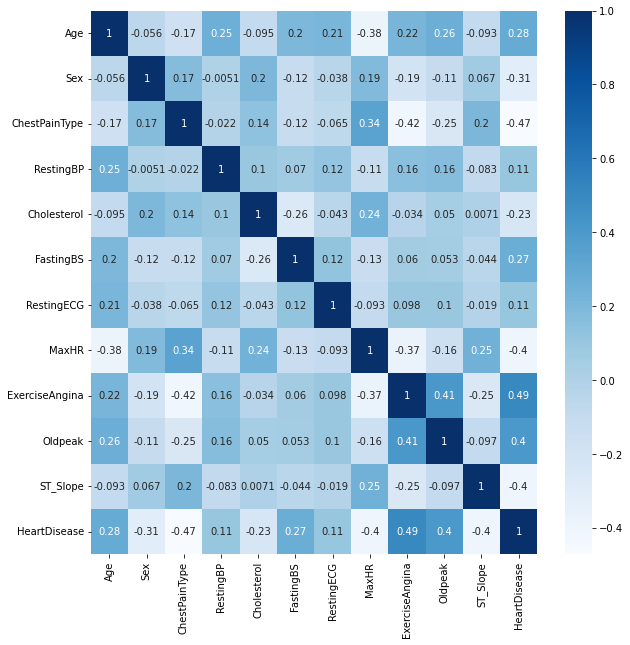

In [50]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(treated_cat_data.corr(), annot=True, cmap="Blues")
plt.show()

Highest possitive correlation:
- ExerciseAngina
- Oldpeak
- Age
- FastingBS
- RestingECG
- RestingBP

Highest negative correlation:
- ChestPainType
- MaxHR
- ST_Slope
- Sex

## 3. Classification



#### Global variables

In [51]:
np.random.seed(36851234)

In [52]:
X_data = treated_cat_data.drop(["HeartDisease"], axis=1)
y_data = treated_cat_data["HeartDisease"]

imp = SimpleImputer(missing_values=0, strategy='mean')
scalar = StandardScaler()
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)

In [53]:
# Creating metrics DF
metric_alg = ['ZeroR', 'NBG', 'KMC', 'KNN', 'DT']
metric_columns  = ['Mean', 'Standard Deviation', 'Inferior Limit', 'Superior Limit']
zeros = np.zeros(4)

metrics_df = pd.DataFrame(index=metric_alg, columns=metric_columns, data=[zeros, zeros, zeros, zeros, zeros])
metrics_df

,Mean,Standard Deviation,Inferior Limit,Superior Limit
ZeroR,0.0,0.0,0.0,0.0
NBG,0.0,0.0,0.0,0.0
KMC,0.0,0.0,0.0,0.0
KNN,0.0,0.0,0.0,0.0
DT,0.0,0.0,0.0,0.0


In [54]:
# Creating scores dictionary
scores = dict()

#### General functions

In [55]:
# pipeline and rfk
def get_metrics(scores):
    mean_ = scores.mean()
    std_ = scores.std()
    inf_, sup_ = stats.norm.interval(0.95, loc=mean_, scale=std_/np.sqrt(len(scores)))

    return mean_, std_, inf_, sup_

In [56]:
def update_metrics_df(metrics_df:pd.DataFrame, estimator:str, mean:float, std:float, inf:float, sup:float) -> None:
    metrics_df.at[estimator, 'Mean'] = mean
    metrics_df.at[estimator, 'Standard Deviation'] = std
    metrics_df.at[estimator, 'Inferior Limit'] = inf
    metrics_df.at[estimator, 'Superior Limit'] = sup

In [57]:
# Shows results 
def show_results(scores:np.array, mean:float, std:float, inf:float, sup:float, estimator:str) -> None:
    print('*'*10, estimator, '*'*10)

    print(f'Mean Accuracy: {mean * 100:0.2f}%')
    print(f'Standard Deviation: {std:0.4f}')
    print(f"Accuracy Confidence Interval (95%%): ({inf:0.4f}, {sup:0.4f})", end='\n\n')

    print(f"Lowest Accuracy {scores.min() * 100:0.2f}%")
    print(f"Highest Accuracy {scores.max() * 100:0.2f}%")

In [58]:
def wilcoxon_p_value(scores1:np.array, scores2:np.array):
    _,p = wilcoxon(scores1, scores2)
    return p

def ttest_p_value(scores1:np.array, scores2:np.array):
    _,p = ttest_rel(scores1, scores2)
    return p

### 3.1. Part 1: ZR and GNB

In [59]:
# classifiers
zeroR = DummyClassifier()
naive = GaussianNB()

In [60]:
# zeroR
pipeline_zr = Pipeline([('imputer', imp), ('transformer', scalar), ('estimator', zeroR)])
scores_zr = cross_val_score(pipeline_zr, X_data, y_data, scoring='accuracy', cv = rkf)
scores_zr

array([0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
       0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055,
       0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
       0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055,
       0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
       0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055])

In [61]:
mean_zr, std_zr, inf_zr, sup_zr = get_metrics(scores_zr)

In [62]:
# NBG
pipeline_nbg = Pipeline([('imputer', imp), ('transformer', scalar), ('estimator', naive)])
scores_nbg = cross_val_score(pipeline_nbg, X_data, y_data, scoring='accuracy', cv = rkf)
scores_nbg

array([0.76086957, 0.79347826, 0.82608696, 0.84782609, 0.81521739,
       0.82608696, 0.80434783, 0.84782609, 0.79120879, 0.81318681,
       0.80434783, 0.80434783, 0.82608696, 0.80434783, 0.77173913,
       0.84782609, 0.85869565, 0.85869565, 0.82417582, 0.76923077,
       0.79347826, 0.84782609, 0.83695652, 0.76086957, 0.80434783,
       0.81521739, 0.79347826, 0.79347826, 0.84615385, 0.84615385])

In [63]:
mean_nbg, std_nbg, inf_nbg, sup_nbg = get_metrics(scores_nbg)

In [64]:
# Updating ZeroR metrics
update_metrics_df(metrics_df, 'ZeroR', mean_zr, std_zr, inf_zr, sup_zr)

In [65]:
# Updating NBG metrics
update_metrics_df(metrics_df, 'NBG', mean_nbg, std_nbg, inf_nbg, sup_nbg)

In [66]:
metrics_df

,Mean,Standard Deviation,Inferior Limit,Superior Limit
ZeroR,0.553368,0.001959,0.552667,0.554069
NBG,0.814453,0.028173,0.804371,0.824534
KMC,0.000000,0.000000,0.000000,0.000000
KNN,0.000000,0.000000,0.000000,0.000000
DT,0.000000,0.000000,0.000000,0.000000


In [67]:
scores['ZR'] = scores_zr
scores['NBG'] = scores_nbg
scores

{'ZR': array([0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
        0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055,
        0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
        0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055,
        0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
        0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055]),
 'NBG': array([0.76086957, 0.79347826, 0.82608696, 0.84782609, 0.81521739,
        0.82608696, 0.80434783, 0.84782609, 0.79120879, 0.81318681,
        0.80434783, 0.80434783, 0.82608696, 0.80434783, 0.77173913,
        0.84782609, 0.85869565, 0.85869565, 0.82417582, 0.76923077,
        0.79347826, 0.84782609, 0.83695652, 0.76086957, 0.80434783,
        0.81521739, 0.79347826, 0.79347826, 0.84615385, 0.84615385])}

***

In [68]:
show_results(scores['ZR'], mean_zr, std_zr, inf_zr, sup_zr, 'ZeroR')

********** ZeroR **********
Mean Accuracy: 55.34%
Standard Deviation: 0.0020
Accuracy Confidence Interval (95%%): (0.5527, 0.5541)

Lowest Accuracy 54.95%
Highest Accuracy 55.43%


In [69]:
show_results(scores['NBG'], mean_nbg, std_nbg, inf_nbg, sup_nbg, 'NBG')

********** NBG **********
Mean Accuracy: 81.45%
Standard Deviation: 0.0282
Accuracy Confidence Interval (95%%): (0.8044, 0.8245)

Lowest Accuracy 76.09%
Highest Accuracy 85.87%


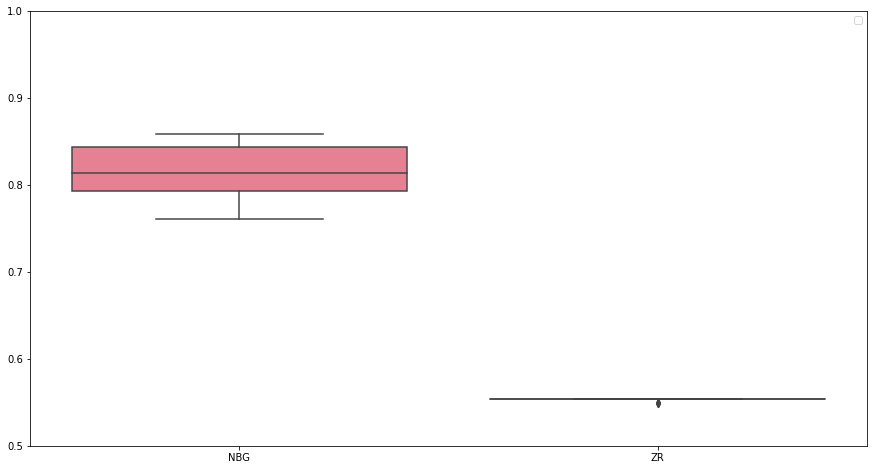

In [70]:
plt.figure(figsize=(15,8))

data = pd.DataFrame(data={'NBG': scores_nbg, 'ZR':scores_zr})
ax = sns.boxplot(data = data, palette='husl')
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles, ["NBG", "ZeroR"], loc="best")
ax.set_ylim([0.5,1])

plt.show()

## Part 2: AD, KNN, Kmeans

In [71]:
best_estimators = dict()

### Descion tree

In [72]:
dt = DecisionTreeClassifier()

In [73]:
# Descion tree
grade_dt = {'estimator__max_depth': [None, 3, 5, 10]}
pipeline_dt = Pipeline([('imputer', imp), ('transformer', scalar), ('estimator', dt)])

gs_dt = GridSearchCV(estimator=pipeline_dt, param_grid = grade_dt, scoring='accuracy', cv = 4)
scores_dict = cross_validate(gs_dt, X_data, y_data, scoring='accuracy', cv = rkf, return_estimator=True)

In [74]:
scores_dt = scores_dict['test_score']
estimators_dt = scores_dict['estimator']

In [75]:
best_depth = np.array([estimator.best_estimator_.get_params()['estimator__max_depth'] for estimator in estimators_dt])

In [76]:
scores['DT'] = scores_dt
best_estimators['DT__best_depth'] = best_depth

In [77]:
mean_dt, std_dt, inf_dt, sup_dt = get_metrics(scores_dt)

In [78]:
# Updating DT metrics
update_metrics_df(metrics_df, 'DT', mean_dt, std_dt, inf_dt, sup_dt)

In [79]:
metrics_df

,Mean,Standard Deviation,Inferior Limit,Superior Limit
ZeroR,0.553368,0.001959,0.552667,0.554069
NBG,0.814453,0.028173,0.804371,0.824534
KMC,0.000000,0.000000,0.000000,0.000000
KNN,0.000000,0.000000,0.000000,0.000000
DT,0.807577,0.037336,0.794217,0.820937


In [80]:
show_results(scores['DT'], mean_dt, std_dt, inf_dt, sup_dt, 'DT')

********** DT **********
Mean Accuracy: 80.76%
Standard Deviation: 0.0373
Accuracy Confidence Interval (95%%): (0.7942, 0.8209)

Lowest Accuracy 72.83%
Highest Accuracy 88.04%


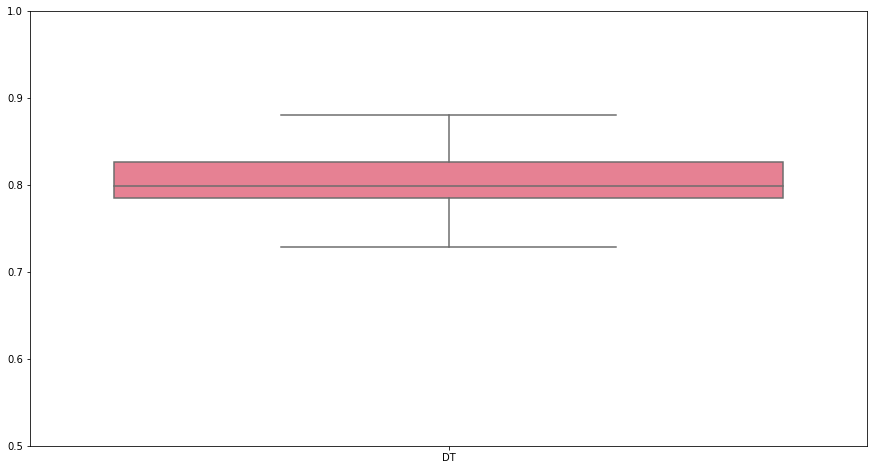

In [81]:
plt.figure(figsize=(15,8))
data = pd.DataFrame(data={'DT': scores_dt})
ax = sns.boxplot(data = data, palette='husl')
ax.set_ylim([0.5,1])

plt.show()

### KNN

In [82]:
knn = KNeighborsClassifier(weights = 'distance')

In [83]:
# K nearest neighbor
grade_knn = {'estimator__n_neighbors': [1, 3, 5, 7]}
pipeline_knn = Pipeline([('imputer', imp), ('transformer', scalar), ('estimator', knn)])

gs_knn = GridSearchCV(estimator=pipeline_knn, param_grid = grade_knn, scoring='accuracy', cv = 4)
scores_dict = cross_validate(gs_knn, X_data, y_data, scoring='accuracy', cv = rkf, return_estimator=True)

In [84]:
scores_knn = scores_dict['test_score']
estimators_knn = scores_dict['estimator']

In [85]:
best_n_neighbors = np.array([estimator.best_estimator_.get_params()['estimator__n_neighbors'] for estimator in estimators_knn])

In [86]:
scores['KNN'] = scores_knn
best_estimators['KNN__n_neighbors'] = best_n_neighbors

In [87]:
mean_knn, std_knn, inf_knn, sup_knn = get_metrics(scores_knn)

In [88]:
# Updating DT metrics
update_metrics_df(metrics_df, 'KNN', mean_knn, std_knn, inf_knn, sup_knn)

In [89]:
metrics_df

,Mean,Standard Deviation,Inferior Limit,Superior Limit
ZeroR,0.553368,0.001959,0.552667,0.554069
NBG,0.814453,0.028173,0.804371,0.824534
KMC,0.000000,0.000000,0.000000,0.000000
KNN,0.805005,0.030343,0.794147,0.815863
DT,0.807577,0.037336,0.794217,0.820937


In [90]:
show_results(scores['KNN'], mean_knn, std_knn, inf_knn, sup_knn, 'KNN')

********** KNN **********
Mean Accuracy: 80.50%
Standard Deviation: 0.0303
Accuracy Confidence Interval (95%%): (0.7941, 0.8159)

Lowest Accuracy 75.00%
Highest Accuracy 86.96%


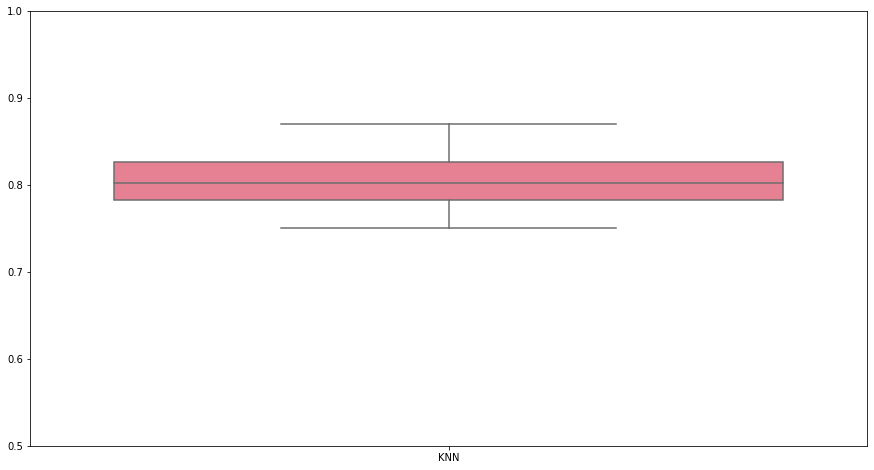

In [91]:
plt.figure(figsize=(15,8))
data = pd.DataFrame(data={'KNN': scores_knn})
ax = sns.boxplot(data = data, palette='husl')
ax.set_ylim([0.5,1])

plt.show()

### KMC

In [92]:
# Class definition
class KMC(BaseEstimator):
    def __init__(self, cluster_size:int=8) -> None:
        super().__init__()
        self.cluster_size = cluster_size
    
    def __div_x_train_class(self, x_train:np.array, y_train:np.array, value:float) -> tuple:
        y_index = [i for i, class_aux in enumerate(y_train) if class_aux == value]
                   
        sel_X_data = np.array([x for i, x in enumerate(x_train) if i in y_index])
        sel_y_data = np.ones(len(sel_X_data)) * value
        
        return sel_X_data, sel_y_data
    
    def fit(self, x_train:np.array, y_train:np.array) -> None:
        self.__classes = np.unique(y_train)
        
        self.__total_clusters = self.cluster_size * len(self.__classes )
        self.__kmeans_estimators = []

        for class_ in self.__classes:
            estimator = KMeans(n_clusters=self.cluster_size)
            X_data, y_data = self.__div_x_train_class(x_train, y_train, value=class_)
            
            estimator.fit(X_data, y_data)
            self.__kmeans_estimators.append(estimator)   
    
    def __get_clusters(self) -> np.array:   
        cluster = np.array([value for estimator in self.__kmeans_estimators for value in estimator.cluster_centers_ ])
        classes = np.array([class_ for estimator, class_ in zip(self.__kmeans_estimators, \
                                        self.__classes) for value in estimator.cluster_centers_ ])
        return cluster, classes
    
    def __distance(self, array1:np.array, array2:np.array):
        return sum([(valu1 - value2)**2 for valu1, value2 in zip(array1, array2)]) ** (1/2)        
        
    def __predict_one(self, row:np.array, cluster_center:np.array) -> int:
        # Row size and cluster_center row size doesn't match         
        if len(row) != len(cluster_center[0][0]):
            print("X data row different size from target fitted data!")
            print('Row size:', len(row))
            print('Cluster row size:', len(cluster_center[0][0]))
            return None
        
        # Adds distances to array in case there are multiple distances         
        distances = []
        for cluster in cluster_center[1:]:
            dist_aux = self.__distance(row, cluster[0])
            class_aux = cluster[-1]
            distances.append((dist_aux, class_aux))
         
        # Sorts distances         
        distances.sort(key=lambda value: value[0])
        
        # Finds smallest distance        
        min_dist = min(distances, key = lambda value: value[0])[0]
        
        # Selects class that appears the most with the smallest distance       
        filter_classes = [class_ for dist, class_ in distances if dist == min_dist]
        mode_class = stats.mode(filter_classes)
        
        return mode_class.mode[0]    
        
    def predict(self, x_test:np.array):
        predictions = []
        x_data, y_data = self.__get_clusters()
        knn = KNeighborsClassifier(1)
        knn.fit(x_data, y_data)
        
        return knn.predict(x_test)
#         for x in x_test:
#             pred_class = self.__predict_one(x, clusters)
#             predictions.append(pred_class)
            
#         return np.array(predictions)           

In [93]:
# KMC
kmc = KMC()
grade_kmc = {'estimator__cluster_size': [1, 3, 5, 7]}
pipeline_kmc = Pipeline([('imputer', imp), ('transformer', scalar), ('estimator', kmc)])

In [94]:
gs_kmc = GridSearchCV(estimator=pipeline_kmc, param_grid = grade_kmc, scoring='accuracy', cv = 4)
scores_dict = cross_validate(gs_kmc, X_data, y_data, scoring='accuracy', cv = rkf, return_estimator=True)

In [95]:
scores_dict

{'fit_time': array([1.52199554, 1.44100189, 1.39300227, 1.39800119, 1.37500286,
        1.39800406, 1.38399744, 1.39100266, 1.49300313, 1.59900498,
        1.67600584, 1.45799971, 1.4700017 , 1.42999434, 1.41799688,
        1.32400298, 1.33500242, 1.30100393, 1.33600116, 1.42800307,
        1.32599902, 1.36399531, 1.34800029, 1.3390038 , 1.38100386,
        1.33099937, 1.35400009, 1.29600143, 1.30000544, 1.29699683]),
 'score_time': array([0.00599861, 0.00599647, 0.00500059, 0.0049963 , 0.00599718,
        0.00600076, 0.006001  , 0.00499868, 0.00699711, 0.00699568,
        0.00399661, 0.00600052, 0.00600052, 0.00600386, 0.00399637,
        0.00500059, 0.00399709, 0.00499892, 0.00499916, 0.00599909,
        0.00800538, 0.00599837, 0.00599694, 0.00399542, 0.00499892,
        0.00400019, 0.00599718, 0.00599885, 0.00500131, 0.00600004]),
 'estimator': [GridSearchCV(cv=4,
               estimator=Pipeline(steps=[('imputer',
                                          SimpleImputer(missing_val

In [96]:
scores_kmc = scores_dict['test_score']
estimators_kmc = scores_dict['estimator']

In [97]:
best_cluster_size = np.array([estimator.best_estimator_.get_params()['estimator__cluster_size'] \
                              for estimator in estimators_kmc])

In [98]:
scores['KMC'] = scores_kmc
best_estimators['KMC__cluster_size'] = best_cluster_size

In [99]:
mean_kmc, std_kmc, inf_kmc, sup_kmc = get_metrics(scores_kmc)

In [100]:
# Updating DT metrics
update_metrics_df(metrics_df, 'KMC', mean_kmc, std_kmc, inf_kmc, sup_kmc)

In [101]:
metrics_df

,Mean,Standard Deviation,Inferior Limit,Superior Limit
ZeroR,0.553368,0.001959,0.552667,0.554069
NBG,0.814453,0.028173,0.804371,0.824534
KMC,0.789779,0.035739,0.776991,0.802568
KNN,0.805005,0.030343,0.794147,0.815863
DT,0.807577,0.037336,0.794217,0.820937


In [102]:
show_results(scores['KMC'], mean_kmc, std_kmc, inf_kmc, sup_kmc, 'KMC')

********** KMC **********
Mean Accuracy: 78.98%
Standard Deviation: 0.0357
Accuracy Confidence Interval (95%%): (0.7770, 0.8026)

Lowest Accuracy 71.74%
Highest Accuracy 85.87%


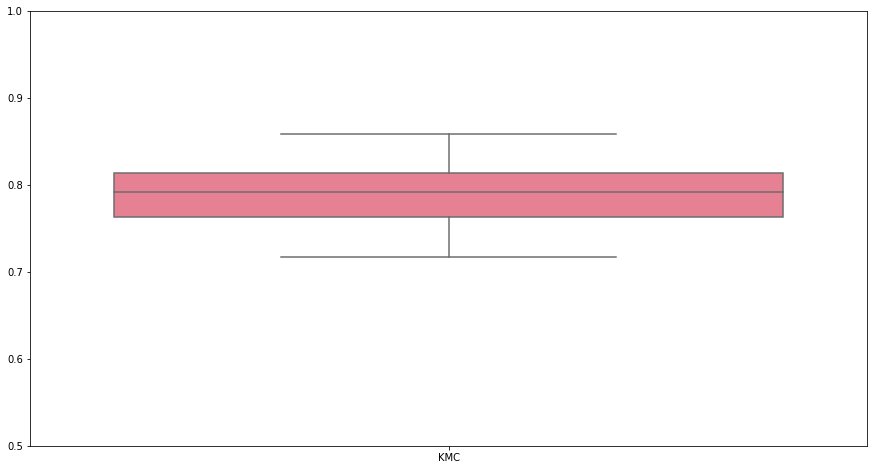

In [103]:
plt.figure(figsize=(15,8))
data = pd.DataFrame(data={'KMC': scores_kmc})
ax = sns.boxplot(data = data, palette='husl')
ax.set_ylim([0.5,1])

plt.show()

## Comparing results

In [104]:
scores

{'ZR': array([0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
        0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055,
        0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
        0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055,
        0.55434783, 0.55434783, 0.55434783, 0.55434783, 0.55434783,
        0.55434783, 0.55434783, 0.55434783, 0.54945055, 0.54945055]),
 'NBG': array([0.76086957, 0.79347826, 0.82608696, 0.84782609, 0.81521739,
        0.82608696, 0.80434783, 0.84782609, 0.79120879, 0.81318681,
        0.80434783, 0.80434783, 0.82608696, 0.80434783, 0.77173913,
        0.84782609, 0.85869565, 0.85869565, 0.82417582, 0.76923077,
        0.79347826, 0.84782609, 0.83695652, 0.76086957, 0.80434783,
        0.81521739, 0.79347826, 0.79347826, 0.84615385, 0.84615385]),
 'DT': array([0.79347826, 0.79347826, 0.76086957, 0.72826087, 0.82608696,
        0.82608696, 0.83695652, 0.81521739, 0.79120879, 0.87912088,
        0.80434783, 0.771

In [105]:
metrics_df

,Mean,Standard Deviation,Inferior Limit,Superior Limit
ZeroR,0.553368,0.001959,0.552667,0.554069
NBG,0.814453,0.028173,0.804371,0.824534
KMC,0.789779,0.035739,0.776991,0.802568
KNN,0.805005,0.030343,0.794147,0.815863
DT,0.807577,0.037336,0.794217,0.820937


In [106]:
data_dict = {i: ["" for _ in range(5)] for i in range(5)}
p_values = pd.DataFrame(data_dict)
p_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      object
 1   1       5 non-null      object
 2   2       5 non-null      object
 3   3       5 non-null      object
 4   4       5 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes


In [107]:
for i, key1 in enumerate(scores.keys()):
    for j, key2 in enumerate(scores.keys()):
        # Estimator name         
        if i == j:
            p_values.at[i, j] = key1
        # Wilcoxon
        elif j < i:
            p_values.at[i, j] = round(wilcoxon_p_value(scores[key1], scores[key2]), 6)
        # Ttest
        else:
            p_values.at[i, j] = round(ttest_p_value(scores[key1], scores[key2]), 6)

In [108]:
p_values

,0,1,2,3,4
0,ZR,0.0,0.0,0.0,0.0
1,0.000002,NBG,0.335672,0.107942,0.000026
2,0.000002,0.566419,DT,0.633861,0.00697
3,0.000002,0.141356,0.665728,KNN,0.018822
4,0.000002,0.000099,0.014608,0.025241,KMC


In [109]:
# function to plot the histogram for a single list.
def make_density(stat, color, x_label, y_label, ax):
    # Draw the histogram and fit a density plot.
    sns.histplot(stat, kde=True, color=color, ax=ax)

    # get the y-coordinates of the points of the density curve.
    dens_list = ax.get_lines()[0].get_data()[1]

    # find the maximum y-coordinates of the density curve.
    max_dens_index = dens_list.argmax()

    # find the mode of the density plot.
    mode_x = ax.get_lines()[0].get_data()[0][max_dens_index]

    # draw a vertical line at the mode of the histogram.
    ax.axvline(mode_x, color='blue', linestyle='dashed', linewidth=1.5)
    ax.text(mode_x * 1.05, 0.16, 'Mode: {:.4f}'.format(mode_x))

    # Plot formatting
    ax.set_xlim((0.7, 0.9))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

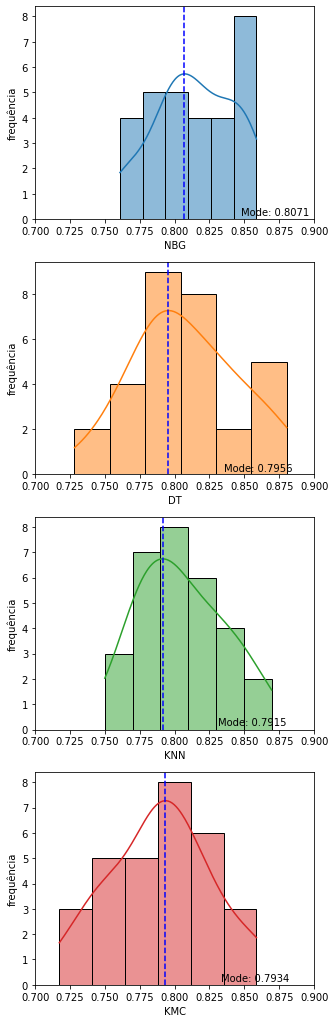

In [110]:
ncols = 1
nrows = 4

scores_without_zr = {key: scores[key] for key in scores if key != 'ZR'}
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5, 18))
colors = plt.cm.tab10.colors

if ncols > 1:
    axes = [a for ax in axes for a in ax]
    
for ax, key, color in zip(axes, scores_without_zr, colors):
    make_density(scores_without_zr[key], color, key, 'frequência', ax)
    
for ax in np.ravel(axes)[5:]:  # remove possible empty subplots at the end
    ax.remove()
plt.show()

In [111]:
p_values

,0,1,2,3,4
0,ZR,0.0,0.0,0.0,0.0
1,0.000002,NBG,0.335672,0.107942,0.000026
2,0.000002,0.566419,DT,0.633861,0.00697
3,0.000002,0.141356,0.665728,KNN,0.018822
4,0.000002,0.000099,0.014608,0.025241,KMC


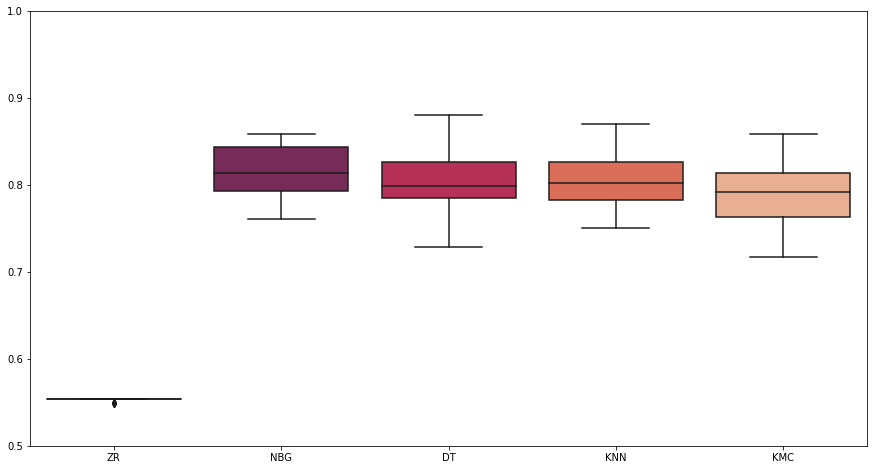

In [112]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data = pd.DataFrame(scores), palette='rocket')
ax.set_ylim([0.5,1])

plt.show()

In [113]:
metrics_df

,Mean,Standard Deviation,Inferior Limit,Superior Limit
ZeroR,0.553368,0.001959,0.552667,0.554069
NBG,0.814453,0.028173,0.804371,0.824534
KMC,0.789779,0.035739,0.776991,0.802568
KNN,0.805005,0.030343,0.794147,0.815863
DT,0.807577,0.037336,0.794217,0.820937


## References

- https://www.investopedia.com/ask/answers/040815/how-should-i-interpret-negative-correlation.asp
- https://arxiv.org/pdf/1604.07202.pdf - An Approach to Find Missing Values in Medical Datasets
- https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7
- https://bmcmedinformdecismak.biomedcentral.com/track/pdf/10.1186/s12911-021-01527-5.pdf - A novel approach for heart disease prediction using strength scores with signifcant predictors